In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import math

import pandas as pd
import os
import rasterio
import contextily as ctx

from shapely.geometry import Point, Polygon, LineString, MultiLineString,MultiPoint,MultiPolygon

from shapely.ops import nearest_points

In [61]:
coast_1942=gpd.read_file('../assets/ECY_historical_shorelines_epsg32149/1942.geojson')

In [15]:
coast_1954=gpd.read_file("../assets/ECY_estimated_shorelines/Oct1/1954.geojson")
                        
coast_1967=gpd.read_file("../assets/ECY_historical_shorelines_epsg32149/1967.geojson")

In [20]:
coast_1974=gpd.read_file("../assets/ECY_historical_shorelines_epsg32149/1974.geojson")

In [5]:
#function to clip the gdf
def clip(polygon_list,gdf_for_clipping):
    polygon=Polygon(polygon_list)
    gdf_after_clipping = gdf_for_clipping.clip(polygon)
    #poly_gdf = gpd.GeoDataFrame([1], geometry=[polygon], crs=gdf_1911.crs)
    return gdf_after_clipping

In [6]:
#I only need South Beach area, clip the gdf
polygon_list_southbeach=[(-124.175972,46.918562),(-123.913222,46.918562),(-123.913222,46.69),(-124.175972,46.69)]

In [22]:
#remove not needed area
coast_1954=clip(polygon_list_southbeach,coast_1954)
coast_1967=clip(polygon_list_southbeach,coast_1967)
coast_1974=clip(polygon_list_southbeach,coast_1974)

/usr/local/Caskroom/miniconda/base/envs/geo/lib/python3.10/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


In [62]:
coast_1942=clip(polygon_list_southbeach,coast_1942)

/usr/local/Caskroom/miniconda/base/envs/geo/lib/python3.10/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


In [3]:
#function to plot the shoreline

def line_show_base(gdf,base_gdf):
    gdf = gdf.to_crs(epsg=3857)

    # assuming gdf1 and gdf2 are your GeoDataFrames
    fig, ax = plt.subplots(figsize = (10,10))

    base_gdf_3857 = base_gdf.to_crs(epsg=3857)

    # plot the base map of 1911
    base = base_gdf_3857.plot(ax=ax, color='blue', edgecolor='black')

    # plot the first GeoDataFrame

    gdf.plot(ax=base, marker='o', color='black', markersize=5)

    ctx.add_basemap(ax,zoom=11,source=ctx.providers.CartoDB.Positron)

    # Show the plot
    plt.show()

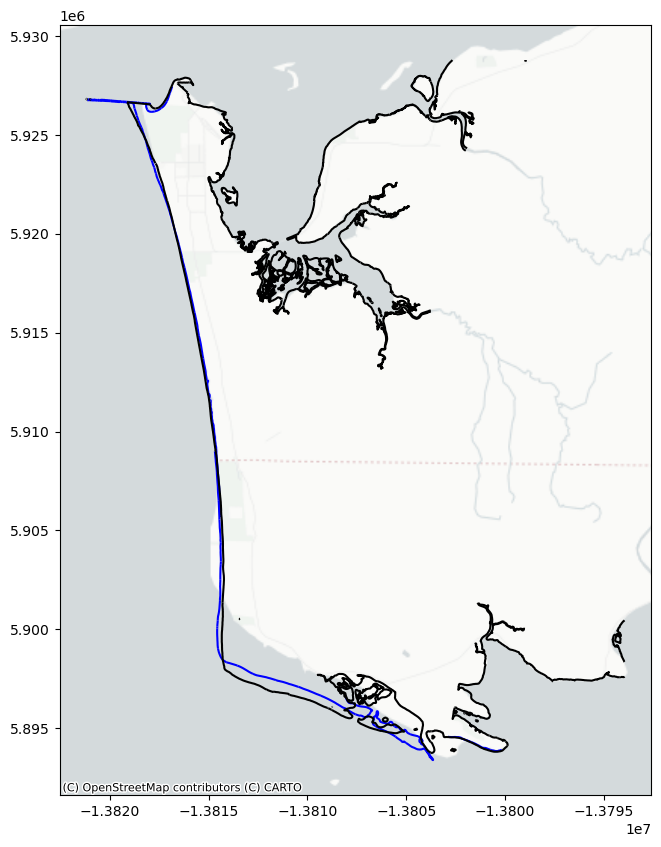

In [19]:
line_show_base(coast_1954,coast_1967)

In [10]:
#function to plot the shoreline

def line_show_single(gdf):
    gdf = gdf.to_crs(epsg=3857)

    # assuming gdf1 and gdf2 are your GeoDataFrames
    fig, ax = plt.subplots(figsize = (10,10))

    #base_gdf_3857 = base_gdf.to_crs(epsg=3857)

    # plot the base map of 1911
    base = gdf.plot(ax=ax, color='blue', edgecolor='black')

    # plot the first GeoDataFrame

    gdf.plot(ax=base, marker='o', color='black', markersize=5)

    ctx.add_basemap(ax,zoom=11,source=ctx.providers.CartoDB.Positron)

    # Show the plot
    plt.show()

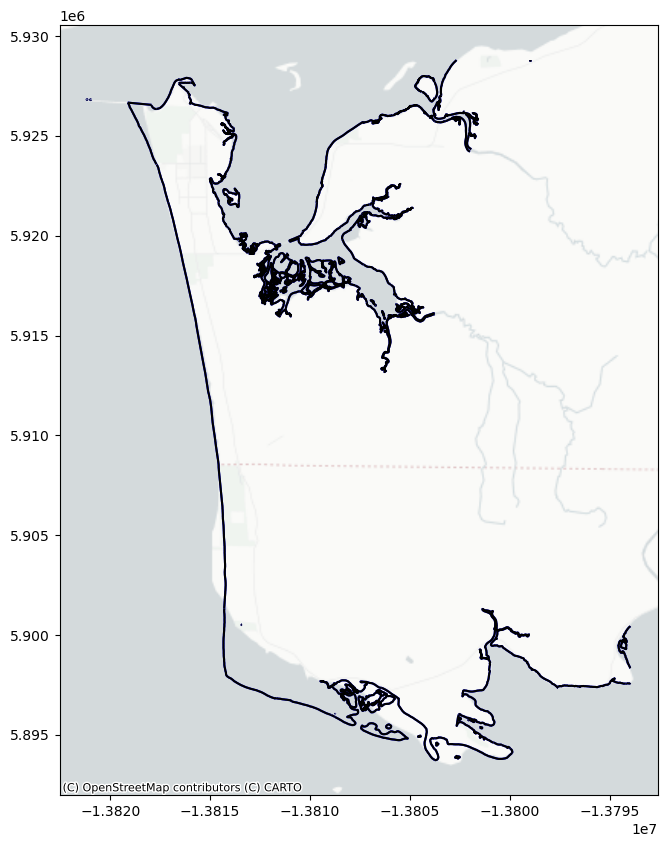

In [17]:
line_show_single(coast_1954)

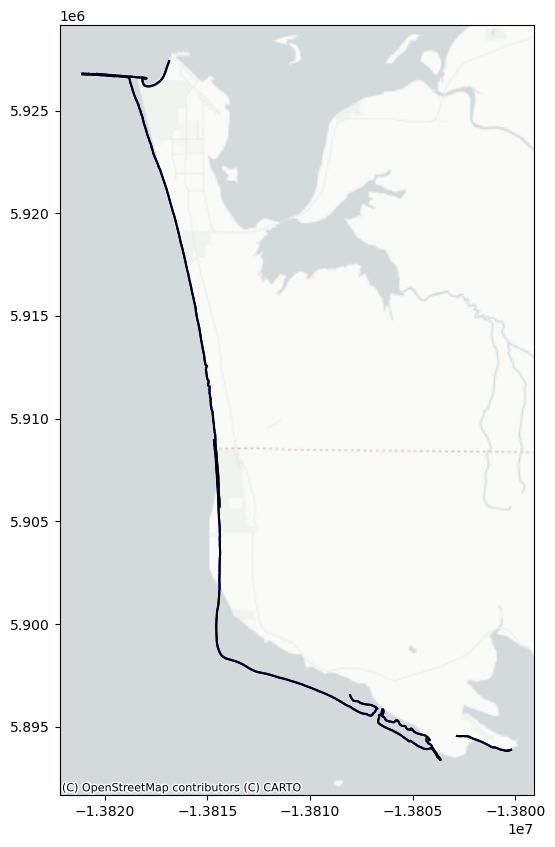

In [12]:
line_show_single(coast_1967)

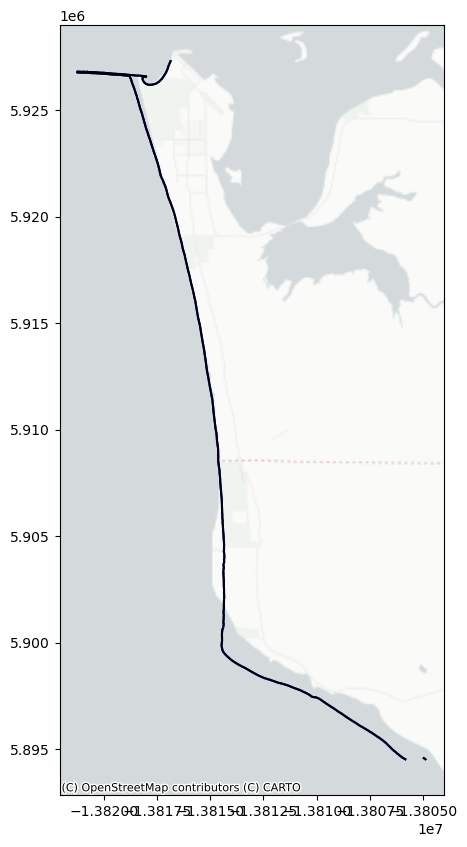

In [23]:
line_show_single(coast_1974)

In [13]:
coast_1967

,id,YEAR,MONTH,DAY,PHOTO,Shape_Leng,geometry
351,351,1963,8,8,shoalw_1963mos.sid,431.684842,"LINESTRING (-123.97412 46.70399, -123.97383 46..."
350,350,1963,8,8,shoalw_1963mos.sid,449.727519,"LINESTRING (-123.97952 46.70535, -123.97931 46..."
363,363,1963,8,8,shoalw_1963mos.sid,2790.629330,"LINESTRING (-124.01064 46.70889, -124.01022 46..."
356,356,1963,8,8,shoalw_1963mos.sid,451.254296,"LINESTRING (-124.01726 46.70811, -124.01658 46..."
358,358,1963,8,8,shoalw_1963mos.sid,490.384962,"LINESTRING (-123.99348 46.70813, -123.99328 46..."
...,...,...,...,...,...,...,...
116,116,1967,4,15,wpn_1967.img,30.275498,"LINESTRING (-124.14707 46.90605, -124.14685 46..."
113,113,1967,4,15,wpn_1967.img,340.405634,"LINESTRING (-124.15732 46.90611, -124.15722 46..."
115,115,1967,4,15,wpn_1967.img,367.023418,"LINESTRING (-124.15174 46.90615, -124.15162 46..."
112,112,1967,4,15,wpn_1967.img,89.557393,"LINESTRING (-124.15286 46.90619, -124.15269 46..."


In [18]:
coast_1954

,FEATURE_ID,FEATURE,SOURCE_ID,DATA_SOURC,SRC_DATE,HOR_ACC,INFORM,RESOLUTION,ATTRIBUTE,CLASS,F_CODE,EX_METH,EXTRACT_TE,geometry
25,698349.0,20.0,T09634N,A,19500101,0,None,0.0,Natural.Mean High Water,SHORELINE,None,S,A,"LINESTRING (-124.04612 46.71639, -124.04610 46..."
26,698348.0,15.0,T09634N,A,19500101,0,None,0.0,Natural.Apparent.Marsh Or Swamp,SHORELINE,None,S,A,"LINESTRING (-124.04648 46.71652, -124.04612 46..."
27,698350.0,20.0,T09634N,A,19500101,0,None,0.0,Natural.Mean High Water,SHORELINE,None,S,A,"LINESTRING (-124.04783 46.71696, -124.04766 46..."
28,698352.0,15.0,T09634N,A,19500101,0,None,0.0,Natural.Apparent.Marsh Or Swamp,SHORELINE,None,S,A,"LINESTRING (-124.04830 46.71709, -124.04784 46..."
29,698347.0,26.0,T09634N,A,19500101,0,None,0.0,Undetermined.Approximate,SHORELINE,None,S,A,"LINESTRING (-124.04584 46.71739, -124.04594 46..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,735205.0,15.0,T09519S,A,19500711,0,None,0.0,Natural.Apparent.Marsh Or Swamp,SHORELINE,None,S,A,"LINESTRING (-124.00128 46.91186, -124.00118 46..."
224,732233.0,15.0,T09518S,A,19500101,0,None,0.0,Natural.Apparent.Marsh Or Swamp,SHORELINE,None,S,A,"LINESTRING (-124.00128 46.91194, -124.00139 46..."
225,736326.0,20.0,T09519S,A,19500711,0,None,0.0,Natural.Mean High Water,SHORELINE,None,S,A,"LINESTRING (-123.99143 46.91856, -123.99167 46..."
157,734814.0,20.0,T09519S,A,19500711,0,None,0.0,Natural.Mean High Water,SHORELINE,None,S,A,"LINESTRING (-123.95817 46.91856, -123.95817 46..."


## plot the line from 1967 to 1974

In [25]:
#break up a linestrings into points
def line_to_points(line):
    points=[]
    for i in range(0,len(line.coords)):
        points.append(Point(line.coords[i]))
    return points

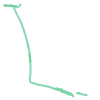

In [24]:
# Extract all the lines from a gdf and combine them into a single MultiLineString
def line_combiner(gdf):
    all_lines = []
    for geom in gdf['geometry']:
        if isinstance(geom, MultiLineString):
            all_lines.extend([line for line in geom.geoms])
        else:  # If it's a LineString
            all_lines.append(geom)

    # Combine all lines into a single MultiLineString
    combined_multiline = MultiLineString(all_lines)

    return combined_multiline

line_combiner(coast_1967)

In [26]:
def year_line_gen (geometry, end_year_gdf, current_year, start_year, end_year):

    multiline_comb=line_combiner(end_year_gdf)

    point_collection=line_to_points(geometry)

    #for each point in the point collection, find the nearest point in the 1954 shoreline
    point_pair_list=[]
    for point in point_collection:
        
        point_pair=nearest_points(point, multiline_comb)[1]
        point_pair_list.append(point_pair)
    
    lines = [LineString([point_collection[i],point_pair_list[i]]) for i in range(len(point_pair_list))]

    empty_interpolated_points=[]

    number_of_sections = abs(end_year - start_year)

    line_bin=[]

    for line in lines:

        step=line.length/number_of_sections

        interpolated_point = line.interpolate(step*(abs(current_year-start_year)))

        line_bin.append(interpolated_point)

    final_line=LineString(line_bin)

    return final_line



In [29]:
for year in range(1973,1967,-1):

    gdf_new=gpd.GeoDataFrame({'geometry':coast_1974['geometry'].apply(year_line_gen, args=(coast_1967, year,1974,1967)),'layer':str(year)},crs="EPSG:4326")
    gdf_new.to_file("../assets/ECY_estimated_shorelines/Oct1/"+str(year)+".geojson", driver='GeoJSON')

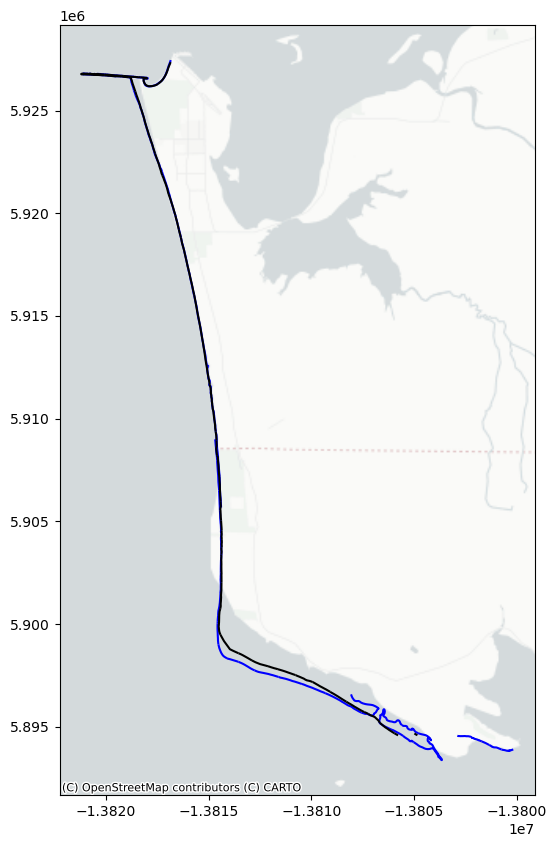

In [34]:
#test our output
coast_1971=gpd.read_file("../assets/ECY_estimated_shorelines/Oct1/1971.geojson")
line_show_base(coast_1971,coast_1967)

## Plot the line from 1974 to 1986

In [35]:
coast_1986=gpd.read_file("../assets/ECY_historical_shorelines_epsg32149/1986.geojson")

In [37]:
coast_1986=clip(polygon_list_southbeach,coast_1986)

/usr/local/Caskroom/miniconda/base/envs/geo/lib/python3.10/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


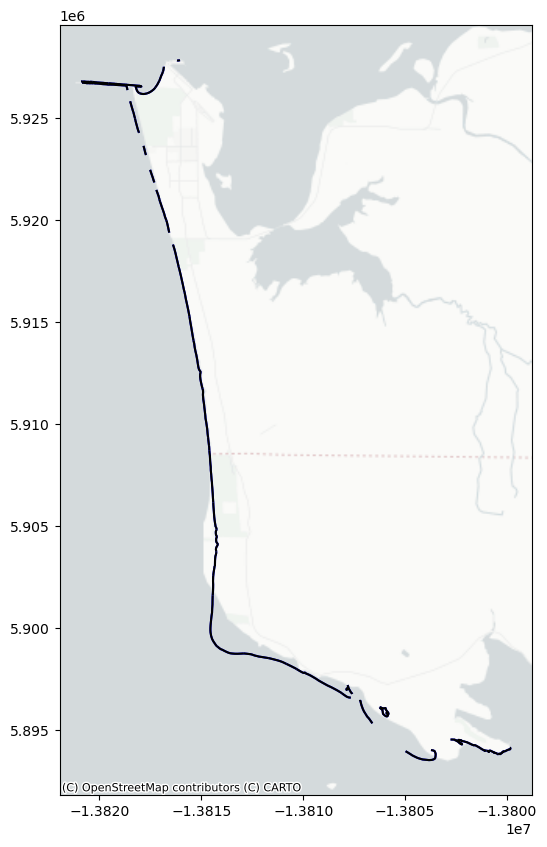

In [38]:
line_show_single(coast_1986)

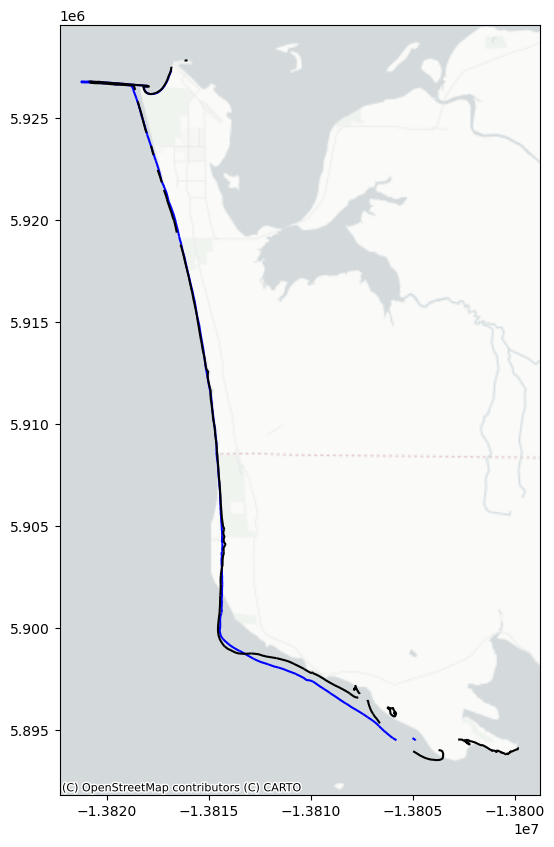

In [39]:
line_show_base(coast_1986,coast_1974)

In [40]:
for year in range(1975,1986):

    gdf_new=gpd.GeoDataFrame({'geometry':coast_1974['geometry'].apply(year_line_gen, args=(coast_1986, year,1974,1986)),'layer':str(year)},crs="EPSG:4326")
    gdf_new.to_file("../assets/ECY_estimated_shorelines/Oct1/"+str(year)+".geojson", driver='GeoJSON')

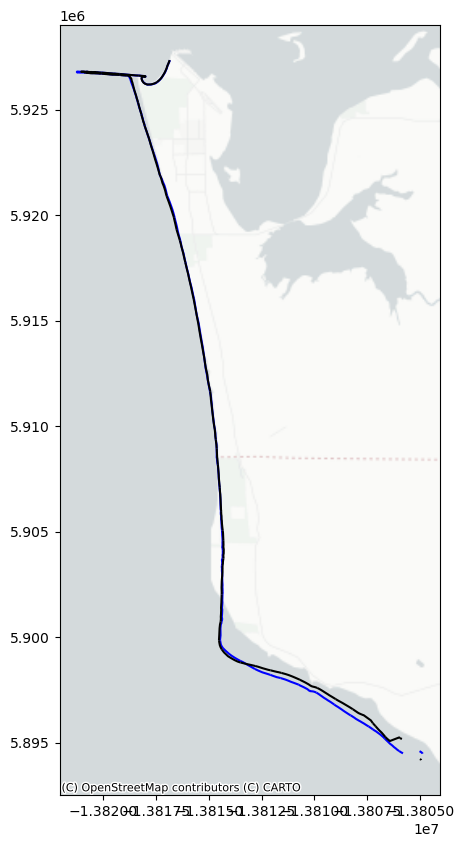

In [41]:
#test our output
coast_1981=gpd.read_file("../assets/ECY_estimated_shorelines/Oct1/1981.geojson")
line_show_base(coast_1981,coast_1974)

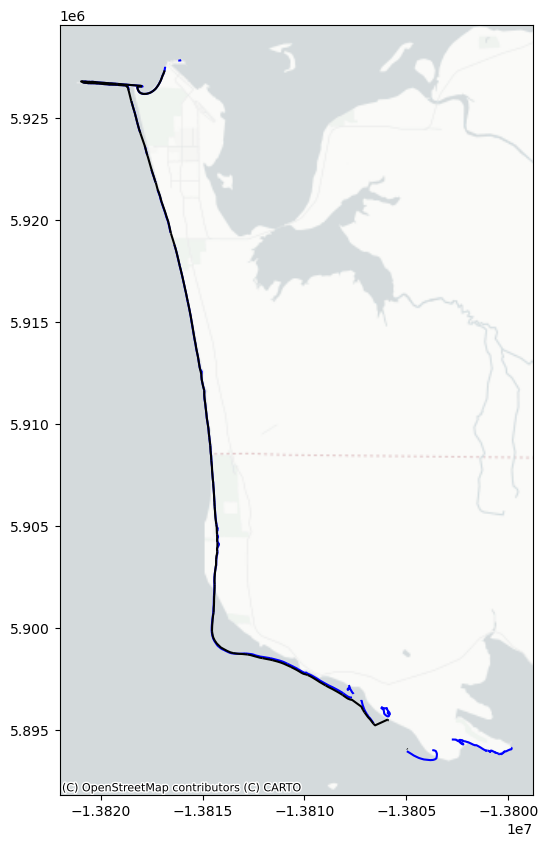

In [43]:
#test our output
coast_1984=gpd.read_file("../assets/ECY_estimated_shorelines/Oct1/1984.geojson")
line_show_base(coast_1984,coast_1986)

## plot from 1954 to 1967

/usr/local/Caskroom/miniconda/base/envs/geo/lib/python3.10/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


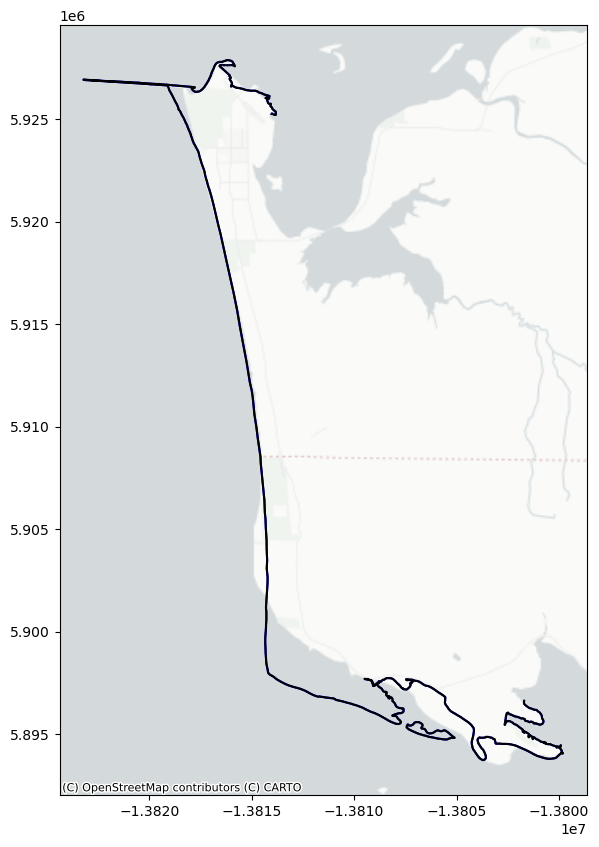

In [44]:
coast_1954=gpd.read_file("../assets/ECY_historical_shorelines_epsg32149/1954.geojson")
coast_1954=clip(polygon_list_southbeach,coast_1954)
line_show_single(coast_1954)

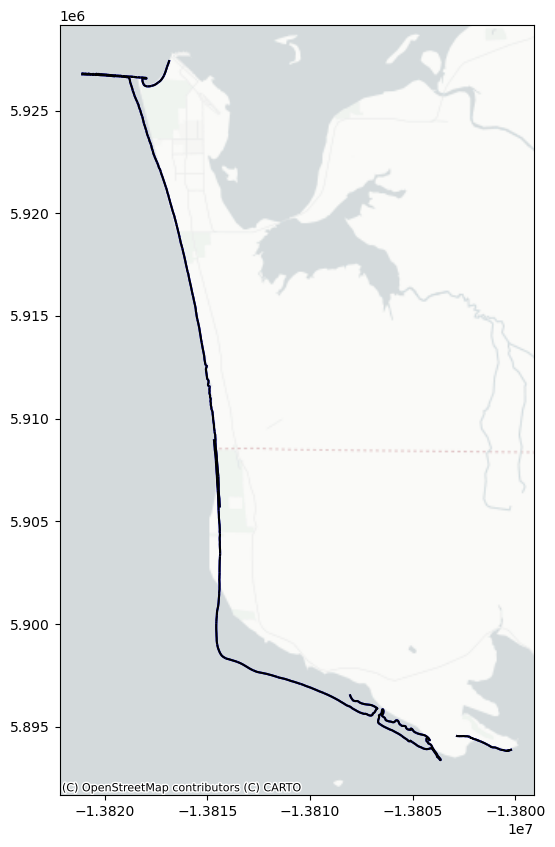

In [45]:
line_show_single(coast_1967)

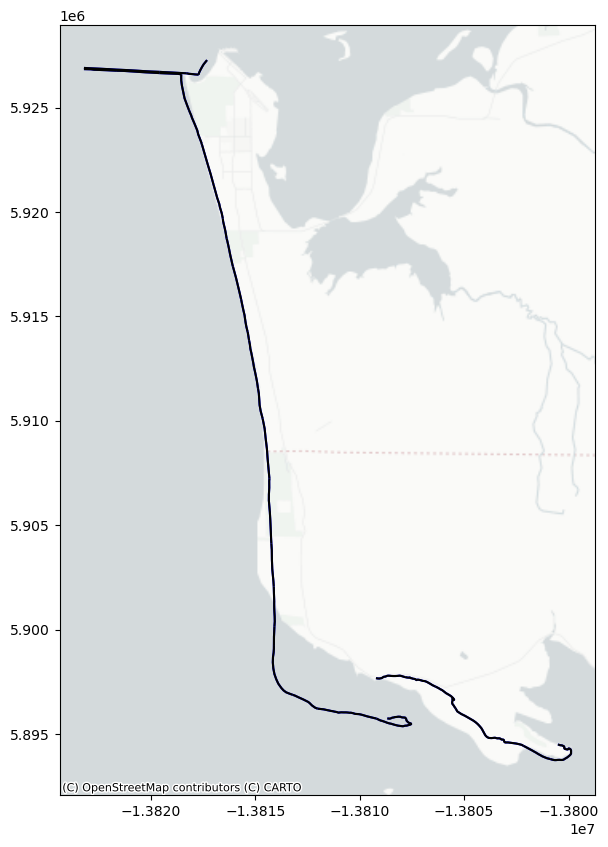

In [63]:
line_show_single(coast_1942)

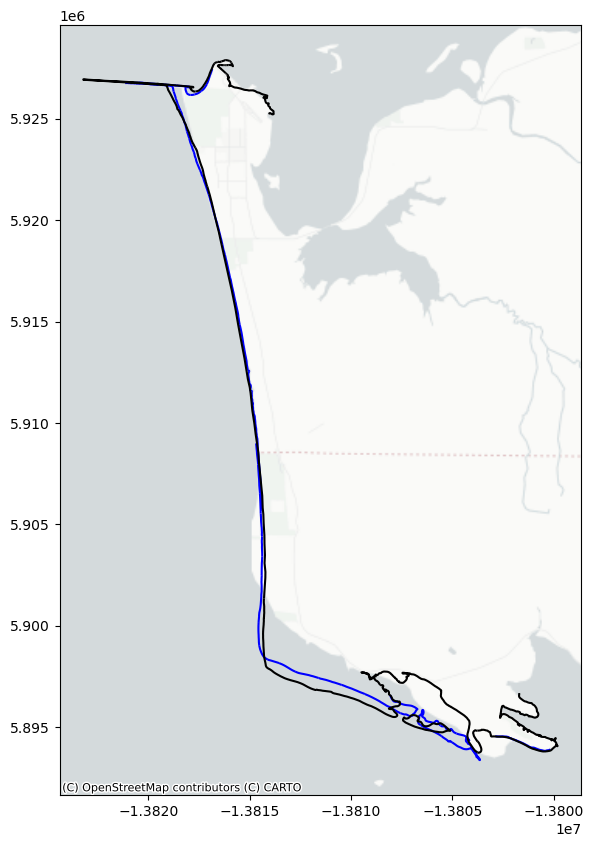

In [49]:
line_show_base(coast_1954,coast_1967)

In [47]:
coast_1954.index

Int64Index([12, 16, 66, 10, 17, 67, 21, 23, 25, 24, 39, 38, 50, 45, 46, 42, 48,
            41, 43, 40, 26,  9, 47, 53, 27, 22, 65],
           dtype='int64')

In [48]:
coast_1954

,id,YEAR,MONTH,Shape_Leng,geometry
12,12,1950,6,512.111785,"LINESTRING (-124.00129 46.70653, -124.00090 46..."
16,16,1950,0,537.473813,"LINESTRING (-124.00129 46.70643, -124.00133 46..."
66,66,1950,0,9261.632933,"LINESTRING (-124.09591 46.74983, -124.09593 46..."
10,10,1950,0,3809.589625,"LINESTRING (-124.03064 46.71436, -124.03071 46..."
17,17,1950,6,9257.288626,"LINESTRING (-123.98289 46.72117, -123.98284 46..."
67,67,1950,0,7551.780757,"LINESTRING (-124.04441 46.72362, -124.04479 46..."
21,21,1951,6,14079.322633,"LINESTRING (-124.12104 46.87481, -124.11995 46..."
23,23,1951,6,1365.650040,"LINESTRING (-124.12629 46.88649, -124.12620 46..."
25,25,1951,6,3038.210031,"LINESTRING (-124.11190 46.90853, -124.11181 46..."
24,24,1951,6,1196.891450,"LINESTRING (-124.12625 46.90357, -124.12605 46..."


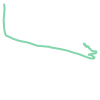

In [185]:
coast_1954.geometry[coast_1954.index[2]]

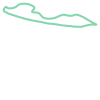

In [53]:
coast_1954.geometry[coast_1954.index[3]]  #this is the geometry of the 4th row, which is an island

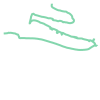

In [54]:
coast_1954.geometry[coast_1954.index[4]]    #this is the geometry of tokeland, which should remain stable throughout the years

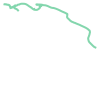

In [55]:
coast_1954.geometry[coast_1954.index[5]]     #we compared this part from 1942 to 1954, we can keep this part unchanged as well

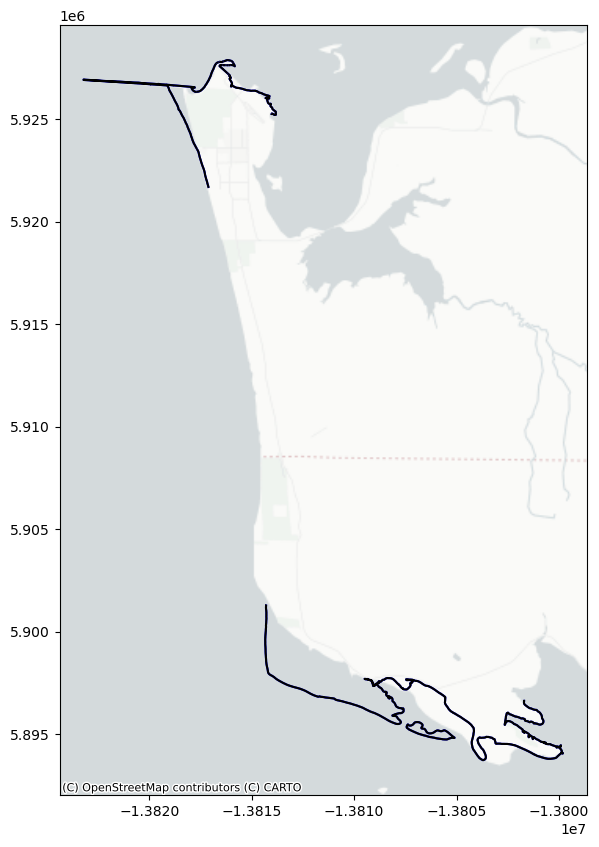

In [135]:
c=coast_1954.drop([coast_1954.index[6]])
line_show_single(c)

In [109]:
coast_1954.index[26]


65

In [179]:
c1=coast_1954.iloc[8:]
c2=coast_1954.iloc[0:2]
c3=coast_1954.iloc[4:6]
c=pd.concat([c1,c2,c3])
c

,id,YEAR,MONTH,Shape_Leng,geometry
25,25,1951,6,3038.210031,"LINESTRING (-124.11190 46.90853, -124.11181 46..."
24,24,1951,6,1196.891450,"LINESTRING (-124.12625 46.90357, -124.12605 46..."
39,39,1951,6,49.766695,"LINESTRING (-124.11239 46.90882, -124.11190 46..."
38,38,1951,6,50.061993,"LINESTRING (-124.11288 46.90913, -124.11239 46..."
50,50,1951,6,475.209944,"LINESTRING (-124.11500 46.91159, -124.11520 46..."
45,45,1951,6,196.553198,"LINESTRING (-124.10973 46.91144, -124.10964 46..."
46,46,1951,6,46.309316,"LINESTRING (-124.11307 46.91154, -124.11295 46..."
42,42,1951,6,60.667459,"LINESTRING (-124.11167 46.91154, -124.11189 46..."
48,48,1951,6,24.203340,"LINESTRING (-124.11307 46.91154, -124.11319 46..."
41,41,1951,6,27.940684,"LINESTRING (-124.11338 46.91157, -124.11375 46..."


In [140]:
interpolate_base=coast_1954.iloc[[2,6,7,25]]
interpolate_base

,id,YEAR,MONTH,Shape_Leng,geometry
66,66,1950,0,9261.632933,"LINESTRING (-124.09591 46.74983, -124.09593 46..."
21,21,1951,6,14079.322633,"LINESTRING (-124.12104 46.87481, -124.11995 46..."
23,23,1951,6,1365.650040,"LINESTRING (-124.12629 46.88649, -124.12620 46..."
22,22,1951,6,9243.570896,"LINESTRING (-124.12628 46.88650, -124.12641 46..."


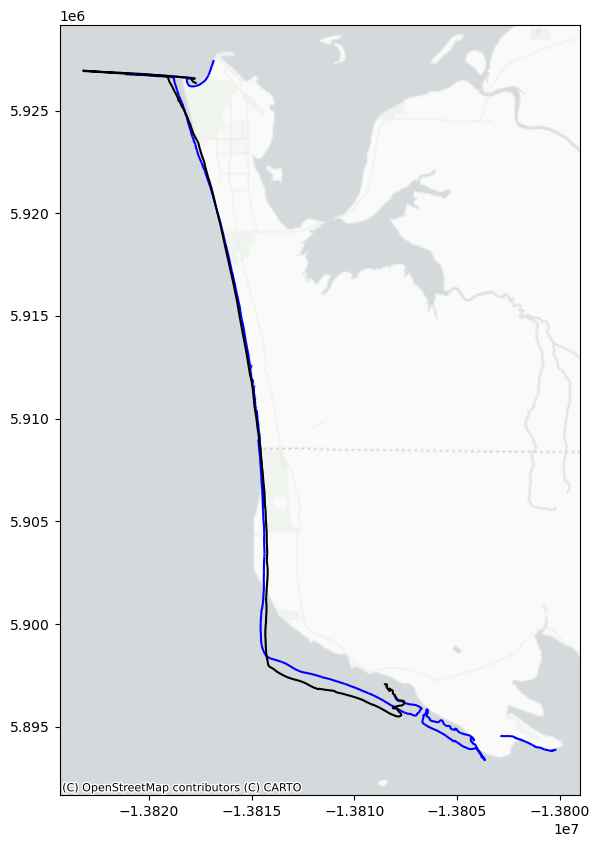

In [142]:
line_show_base(interpolate_base,coast_1967)

In [119]:
c=pd.concat(coast_1954.iloc[8:])

,id,YEAR,MONTH,Shape_Leng,geometry
25,25,1951,6,3038.210031,"LINESTRING (-124.11190 46.90853, -124.11181 46..."
24,24,1951,6,1196.891450,"LINESTRING (-124.12625 46.90357, -124.12605 46..."
39,39,1951,6,49.766695,"LINESTRING (-124.11239 46.90882, -124.11190 46..."
38,38,1951,6,50.061993,"LINESTRING (-124.11288 46.90913, -124.11239 46..."
50,50,1951,6,475.209944,"LINESTRING (-124.11500 46.91159, -124.11520 46..."
45,45,1951,6,196.553198,"LINESTRING (-124.10973 46.91144, -124.10964 46..."
46,46,1951,6,46.309316,"LINESTRING (-124.11307 46.91154, -124.11295 46..."
42,42,1951,6,60.667459,"LINESTRING (-124.11167 46.91154, -124.11189 46..."
48,48,1951,6,24.203340,"LINESTRING (-124.11307 46.91154, -124.11319 46..."
41,41,1951,6,27.940684,"LINESTRING (-124.11338 46.91157, -124.11375 46..."


In [113]:
coast_1954.loc[65]

id                                                           65
YEAR                                                       1951
MONTH                                                         6
Shape_Leng                                           147.157697
geometry      LINESTRING (-124.11306979205234 46.91303128166...
Name: 65, dtype: object

In [102]:
coast_1954.index[-1]

65

In [144]:
print(coast_1954.geometry[coast_1954.index[2]])

LINESTRING (-124.09590998041058 46.74982777336433, -124.0959327447756 46.74976669377363, -124.09594811196666 46.74960650213101, -124.09594052293185 46.7495569280662, -124.09596332674877 46.74943477722011, -124.09598611999238 46.748763422567386, -124.09594794063722 46.74840101669157, -124.09585642452356 46.74791659702515, -124.09584109745576 46.74766097944529, -124.09581065794315 46.74750461604202, -124.09581838862889 46.747210846105126, -124.09581058287951 46.74711174682635, -124.09581827486824 46.74708885100018, -124.09581060564233 46.74685607022958, -124.09581819169227 46.746776047660994, -124.09581070146459 46.746444199071924, -124.09582598462686 46.74624573591224, -124.09579530295379 46.745650777667024, -124.09581825269028 46.74525015013277, -124.09583352747518 46.74521195993914, -124.09586396581398 46.74486864995513, -124.09588698096032 46.74439189452966, -124.09594031684874 46.74401423561967, -124.09594796065835 46.74398754177661, -124.09597084439771 46.74396839042868, -124.09594

In [145]:
#get the number of points in linestring
print(len(coast_1954.geometry[coast_1954.index[2]].coords))

387


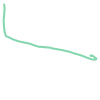

In [186]:
#remove the last 110 point
LineString(coast_1954.geometry[coast_1954.index[2]].coords[0:-110])

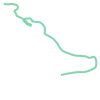

In [187]:
LineString(coast_1954.geometry[coast_1954.index[2]].coords[-110:])

In [188]:
print(LineString(coast_1954.geometry[coast_1954.index[2]].coords[-110:]))

LINESTRING (-124.0390080045493 46.71690466289248, -124.03888583430546 46.71691983264262, -124.03848909980032 46.71700384485627, -124.03839753308073 46.717011455612045, -124.0383594517626 46.71702670229436, -124.03768048320451 46.7171372952663, -124.03741344946857 46.717167909834615, -124.0371692111929 46.71717164961254, -124.03700909477152 46.71716026891911, -124.03681077970161 46.717171735638146, -124.03667335290632 46.717194550219816, -124.03642930648132 46.7172670891936, -124.03630707999665 46.71731279160696, -124.0361010599455 46.717400619291666, -124.03591812667614 46.71750363424614, -124.03578076240328 46.717602709829556, -124.03571961405912 46.71767523285661, -124.03567383773509 46.71787363818873, -124.03568148258164 46.718056746881196, -124.03567382340071 46.718102431615, -124.03570443658788 46.7183428039887, -124.03573485803106 46.71840771746996, -124.0357578358569 46.718483976846635, -124.03579605625004 46.71853359358797, -124.03581891674865 46.71856412625653, -124.0359027852

In [166]:
interpolate_base.iloc[0]

id                                                           66
YEAR                                                     1950.0
MONTH                                                       0.0
Shape_Leng                                          9261.632933
geometry      LINESTRING (-124.09590998041058 46.74982777336...
Name: 66, dtype: object

In [167]:
interpolate_base.iloc[0, interpolate_base.columns.get_loc('geometry')] =LineString(coast_1954.geometry[coast_1954.index[2]].coords[0:-110])

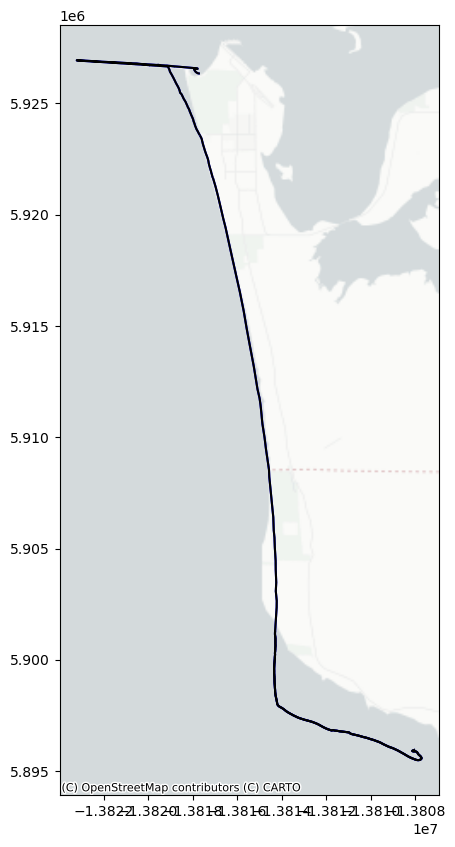

In [168]:
line_show_single(interpolate_base)

In [191]:
g = gpd.GeoDataFrame({'geometry': [LineString(coast_1954.geometry[coast_1954.index[2]].coords[-110:])]}, crs="EPSG:4326")
g

,geometry
0,"LINESTRING (-124.03901 46.71690, -124.03889 46..."


In [189]:
gpd.GeoDataFrame({'geometry': [LineString(coast_1954.geometry[coast_1954.index[2]].coords[-110:])]}, crs="EPSG:4326")

,geometry
0,"LINESTRING (-124.03901 46.71690, -124.03889 46..."


In [184]:
coast_1954

,id,YEAR,MONTH,Shape_Leng,geometry
12,12,1950,6,512.111785,"LINESTRING (-124.00129 46.70653, -124.00090 46..."
16,16,1950,0,537.473813,"LINESTRING (-124.00129 46.70643, -124.00133 46..."
66,66,1950,0,9261.632933,"LINESTRING (-124.09591 46.74983, -124.09593 46..."
10,10,1950,0,3809.589625,"LINESTRING (-124.03064 46.71436, -124.03071 46..."
17,17,1950,6,9257.288626,"LINESTRING (-123.98289 46.72117, -123.98284 46..."
67,67,1950,0,7551.780757,"LINESTRING (-124.04441 46.72362, -124.04479 46..."
21,21,1951,6,14079.322633,"LINESTRING (-124.12104 46.87481, -124.11995 46..."
23,23,1951,6,1365.650040,"LINESTRING (-124.12629 46.88649, -124.12620 46..."
25,25,1951,6,3038.210031,"LINESTRING (-124.11190 46.90853, -124.11181 46..."
24,24,1951,6,1196.891450,"LINESTRING (-124.12625 46.90357, -124.12605 46..."


In [192]:
c=pd.concat([c,g])
c

,id,YEAR,MONTH,Shape_Leng,geometry
25,25,1951.0,6.0,3038.210031,"LINESTRING (-124.11190 46.90853, -124.11181 46..."
24,24,1951.0,6.0,1196.891450,"LINESTRING (-124.12625 46.90357, -124.12605 46..."
39,39,1951.0,6.0,49.766695,"LINESTRING (-124.11239 46.90882, -124.11190 46..."
38,38,1951.0,6.0,50.061993,"LINESTRING (-124.11288 46.90913, -124.11239 46..."
50,50,1951.0,6.0,475.209944,"LINESTRING (-124.11500 46.91159, -124.11520 46..."
45,45,1951.0,6.0,196.553198,"LINESTRING (-124.10973 46.91144, -124.10964 46..."
46,46,1951.0,6.0,46.309316,"LINESTRING (-124.11307 46.91154, -124.11295 46..."
42,42,1951.0,6.0,60.667459,"LINESTRING (-124.11167 46.91154, -124.11189 46..."
48,48,1951.0,6.0,24.203340,"LINESTRING (-124.11307 46.91154, -124.11319 46..."
41,41,1951.0,6.0,27.940684,"LINESTRING (-124.11338 46.91157, -124.11375 46..."


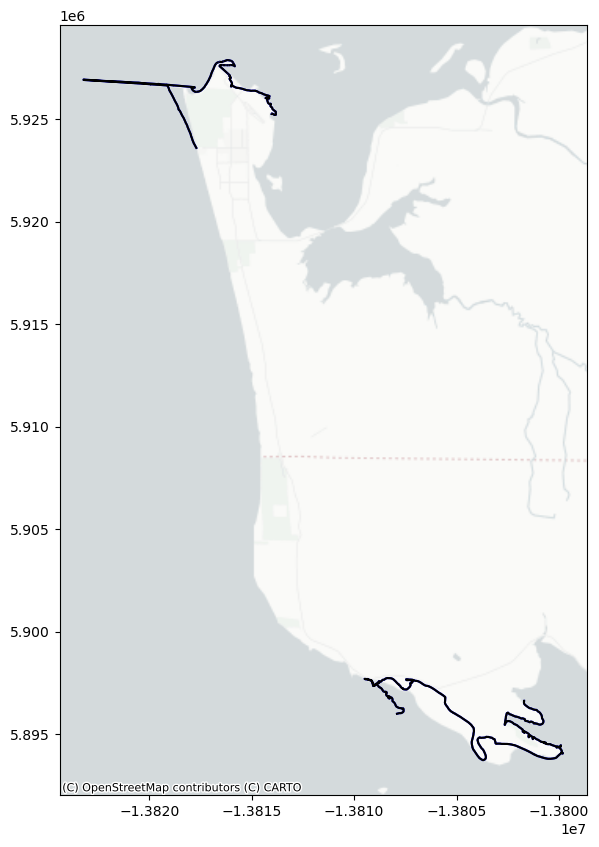

In [196]:
line_show_single(c)

In [194]:
for year in range(1955,1967):

    gdf_new=gpd.GeoDataFrame({'geometry':interpolate_base['geometry'].apply(year_line_gen, args=(coast_1967, year,1954,1967)),'layer':str(year)},crs="EPSG:4326")
    gdf_new=pd.concat([gdf_new,c])
    gdf_new.to_file("../assets/ECY_estimated_shorelines/Oct1/"+str(year)+".geojson", driver='GeoJSON')

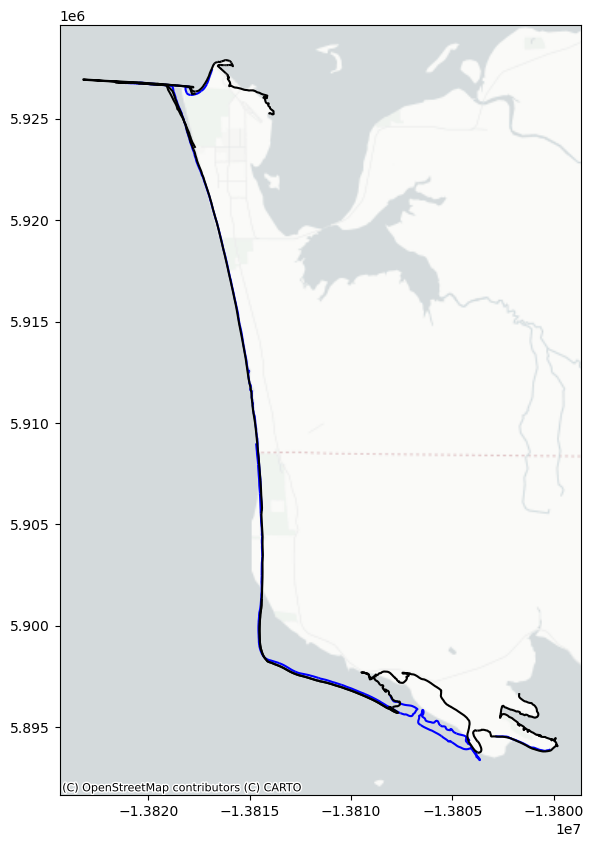

In [198]:
#test our output
coast_1964=gpd.read_file("../assets/ECY_estimated_shorelines/Oct1/1964.geojson")
line_show_base(coast_1964,coast_1967)

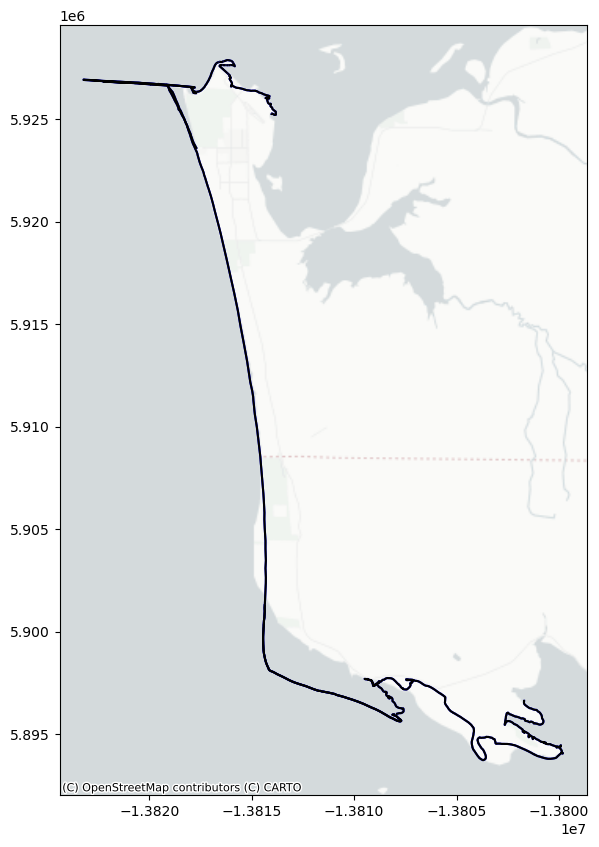

In [197]:
line_show_single(coast_1960)

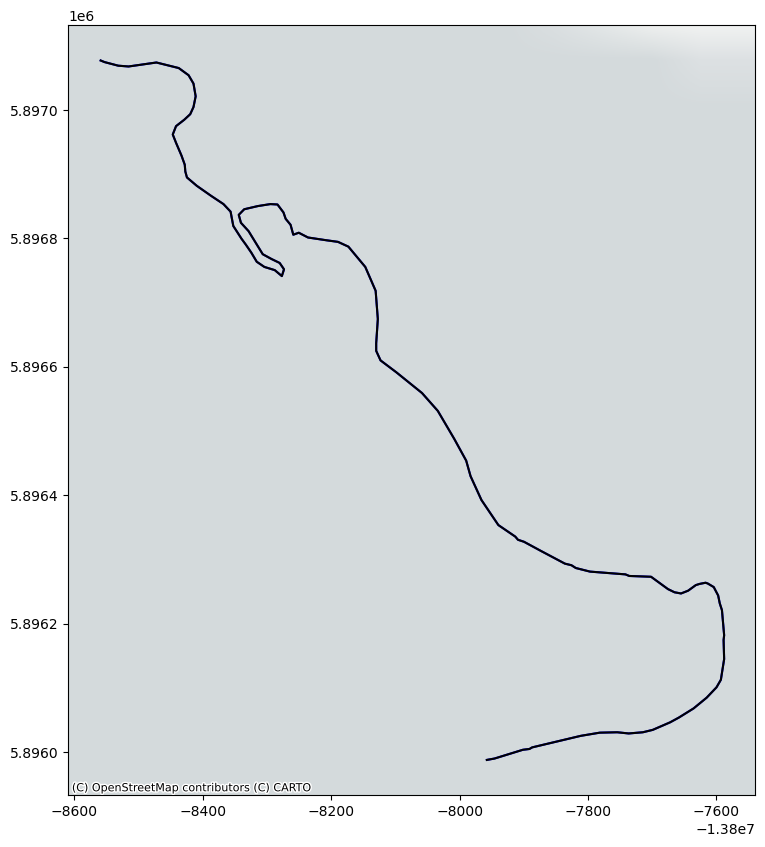

In [181]:
line_show_single(g)